In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plots


In [16]:
dbFile = 'twi_neo_pattern1_v1.7_1yrs.db'
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [17]:
bundleList = []
sql = 'note like "twi%"'
metric = metrics.CountMetric(col='night')
slicer = slicers.HealpixSlicer()
summaryStats = [metrics.SumMetric()]
plotDict = {}
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, summaryMetrics=summaryStats))

# The alt/az plots of all the pointings
slicer = slicers.HealpixSlicer(useCache=False,latCol='altitude',
                            lonCol='azimuth')
metric = metrics.CountMetric('night', metricName='Nvisits as function of Alt/Az')
plotFuncs = [plots.LambertSkyMap()]

plotDict = {'norm': 'log'}
bundle = metricBundles.MetricBundle(metric, slicer, sql, plotFuncs=plotFuncs)
bundleList.append(bundle)


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying database SummaryAllProps with constraint note like "twi%" for columns ['fieldRA', 'night', 'azimuth', 'altitude', 'fieldDec']
Found 123727 visits
Running:  ['opsim_Count_night_note_like_twi_HEAL']
Completed metric generation.
Running:  ['opsim_Nvisits_as_function_of_Alt_Az_note_like_twi_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "note like "twi%"" constraint now.


/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/healpy/pixelfunc.py:1583: UserWarning: monopole: 45.1539  dipole: lon: 65.5061, lat: -76.029, amp: 76.4185
  mono, lon, lat, amp


Plotting complete.


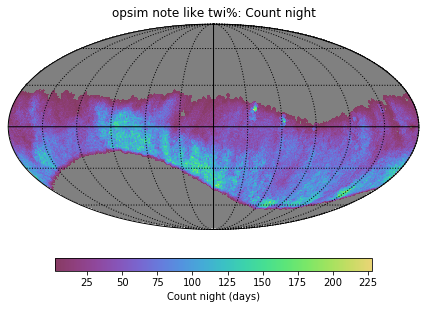

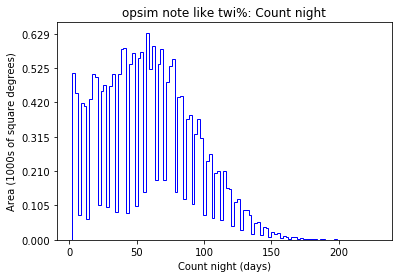

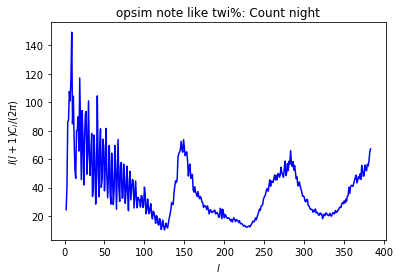

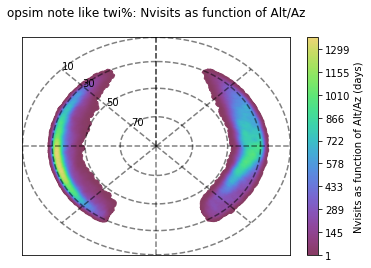

In [18]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)